In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# set seed
np.random.seed(1)

# Data

- http://www.healthdata.org/us-health/data-download

## Obesity

Classification:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In [3]:
# read obesity data for ML
obesity_ml = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_ml.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### Data Dictionary
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [4]:
# rename columns
obesity_ml = obesity_ml.rename(columns={"FAVC": "high_caloric_food",
                           "FCVC": "vegetables",
                          "NCP": "main_meals",
                          "CAEC":"food_between_meals",
                          "CALC":"alcohol",
                          "SCC":"monitor_calories",
                          "FAF":"physical_activity",
                          "TUE": "technology_use",
                          "MTRANS":"transportation",
                            "CH2O":"water",
                        "NObeyesdad":"obesity"})
obesity_ml.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,vegetables,main_meals,food_between_meals,SMOKE,water,monitor_calories,physical_activity,technology_use,alcohol,transportation,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
obesity2 = obesity_ml.copy()
obesity2["bmi"] = round(obesity2["Weight"]/(obesity2["Height"])**2,1)
obesity2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,vegetables,main_meals,food_between_meals,SMOKE,water,monitor_calories,physical_activity,technology_use,alcohol,transportation,obesity,bmi
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3


In [6]:
features = list(obesity2)
# we have 16 predictors
features

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'high_caloric_food',
 'vegetables',
 'main_meals',
 'food_between_meals',
 'SMOKE',
 'water',
 'monitor_calories',
 'physical_activity',
 'technology_use',
 'alcohol',
 'transportation',
 'obesity',
 'bmi']

In [7]:
# Since weight and height were used to calculate BMI, remove from list of features
numeric = ['Age','vegetables','main_meals', 'water','physical_activity','technology_use','bmi']
obesity_num = obesity2.loc[:, numeric] 
obesity_num.head()

,Age,vegetables,main_meals,water,physical_activity,technology_use,bmi
0,21.0,2.0,3.0,2.0,0.0,1.0,24.4
1,21.0,3.0,3.0,3.0,3.0,0.0,24.2
2,23.0,2.0,3.0,2.0,2.0,1.0,23.8
3,27.0,3.0,3.0,2.0,2.0,0.0,26.9
4,22.0,2.0,1.0,2.0,0.0,0.0,28.3


In [8]:
categorical = ['Gender', 'family_history_with_overweight','high_caloric_food', 'food_between_meals', 'SMOKE', 'monitor_calories','alcohol','transportation','obesity']
obesity_cat_w_output = obesity2.loc[:, categorical] 
obesity_cat_wo_output = obesity_cat_w_output.drop(["obesity"], axis=1)
obesity_cat = pd.get_dummies(data=obesity_cat_wo_output, drop_first=True)
obesity_cat.head()

,Gender_Male,family_history_with_overweight_yes,high_caloric_food_yes,food_between_meals_Frequently,food_between_meals_Sometimes,food_between_meals_no,SMOKE_yes,monitor_calories_yes,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0
2,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [9]:
# merge numeric and catorical dfs
obesity3 = pd.concat([obesity_num, obesity_cat], axis=1, join='outer')
obesity3.head()

,Age,vegetables,main_meals,water,physical_activity,technology_use,bmi,Gender_Male,family_history_with_overweight_yes,high_caloric_food_yes,...,food_between_meals_no,SMOKE_yes,monitor_calories_yes,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,24.4,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.2,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.8,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.9,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,28.3,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
# look for correlations
obesity3.corr()

,Age,vegetables,main_meals,water,physical_activity,technology_use,bmi,Gender_Male,family_history_with_overweight_yes,high_caloric_food_yes,...,food_between_meals_no,SMOKE_yes,monitor_calories_yes,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
Age,1.000000,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.244218,0.048394,0.205725,0.063902,...,-0.061795,0.091987,-0.116283,0.082566,-0.012483,-0.018803,0.003652,0.020286,-0.554448,-0.063064
vegetables,0.016291,1.000000,0.042216,0.068461,0.019939,-0.101135,0.263554,-0.274505,0.040372,-0.027283,...,-0.103902,0.014320,0.071852,-0.018655,0.082804,-0.077072,-0.029843,-0.007512,0.057966,0.013991
main_meals,-0.043944,0.042216,1.000000,0.057088,0.129504,0.036326,0.039842,0.067600,0.071370,-0.007000,...,-0.146328,0.007811,-0.015624,-0.019126,0.099280,-0.092407,0.023312,0.003875,-0.056849,0.006502
water,-0.045304,0.068461,0.057088,1.000000,0.167236,0.011965,0.144244,0.107930,0.147437,0.009719,...,0.159008,-0.031995,0.008036,0.049442,0.062251,-0.083272,0.026139,-0.000946,0.037504,0.008307
physical_activity,-0.144938,0.019939,0.129504,0.167236,1.000000,0.058562,-0.177531,0.189607,-0.056673,-0.107995,...,0.024298,0.011216,0.074221,0.054739,-0.136138,0.118678,0.067129,-0.016351,-0.048751,0.108927
technology_use,-0.296931,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.099655,0.017269,0.022943,0.068417,...,-0.110870,0.017613,-0.010928,0.060964,-0.102871,0.079755,-0.021725,-0.067402,0.143597,0.073404
bmi,0.244218,0.263554,0.039842,0.144244,-0.177531,-0.099655,1.000000,-0.052868,0.483460,0.246123,...,-0.083941,-0.000833,-0.184358,-0.062734,0.235538,-0.216840,-0.032615,-0.035737,0.088104,-0.124480
Gender_Male,0.048394,-0.274505,0.067600,0.107930,0.189607,0.017269,-0.052868,1.000000,0.102512,0.064934,...,0.062930,0.044698,-0.102633,0.034848,-0.037694,0.024163,0.057001,0.045203,-0.160184,0.039317
family_history_with_overweight_yes,0.205725,0.040372,0.071370,0.147437,-0.056673,0.022943,0.483460,0.102512,1.000000,0.208036,...,-0.189341,0.017385,-0.185422,-0.022154,-0.024637,0.033482,-0.015435,-0.051011,-0.058927,-0.067076
high_caloric_food_yes,0.063902,-0.027283,-0.007000,0.009719,-0.107995,0.068417,0.246123,0.064934,0.208036,1.000000,...,-0.029677,-0.050660,-0.190658,-0.056795,0.139611,-0.121809,-0.082005,-0.035401,0.028539,-0.179473


<AxesSubplot:>

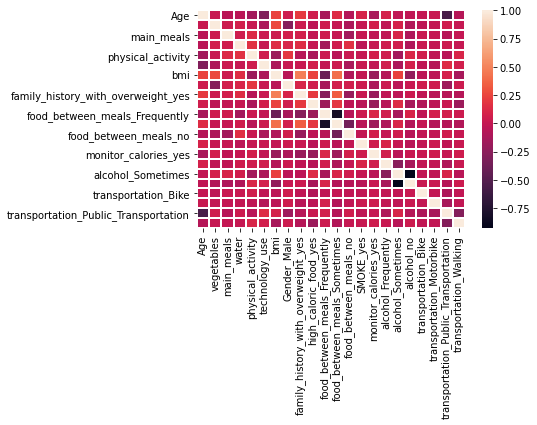

In [11]:
sns.heatmap(obesity3.corr(),annot=False,lw=1)

### Regression

In [12]:
features = list(obesity3)
features.remove("bmi")
features

['Age',
 'vegetables',
 'main_meals',
 'water',
 'physical_activity',
 'technology_use',
 'Gender_Male',
 'family_history_with_overweight_yes',
 'high_caloric_food_yes',
 'food_between_meals_Frequently',
 'food_between_meals_Sometimes',
 'food_between_meals_no',
 'SMOKE_yes',
 'monitor_calories_yes',
 'alcohol_Frequently',
 'alcohol_Sometimes',
 'alcohol_no',
 'transportation_Bike',
 'transportation_Motorbike',
 'transportation_Public_Transportation',
 'transportation_Walking']

In [13]:
X = obesity3[features]
y = obesity3['bmi'].values.reshape(-1, 1)
X.shape, y.shape

((2111, 21), (2111, 1))

In [14]:
# scale data before splitting data
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit(X)
y_scale = StandardScaler().fit(y)

X_scaled = X_scale.transform(X)
y_scaled = y_scale.transform(y)

In [15]:
# split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = .20, random_state = 40)

In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5013302051917763
Testing Score: -1.2057870174903615e+21


In [17]:
y_pred = model.predict(X_test)

In [18]:
#Build a simpler model
obesity3.head()

,Age,vegetables,main_meals,water,physical_activity,technology_use,bmi,Gender_Male,family_history_with_overweight_yes,high_caloric_food_yes,...,food_between_meals_no,SMOKE_yes,monitor_calories_yes,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,24.4,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.2,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.8,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.9,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,28.3,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
features = list(obesity3)

# items to be removed 
unwanted_var = {'food_between_meals_Frequently', 
                'food_between_meals_Sometimes',
                'food_between_meals_no',
               'transportation_Bike',
               'transportation_Motorbike',
                'transportation_Public_Transportation',
                'transportation_Walking'} 
  
select_features = [ele for ele in features if ele not in unwanted_var] 

select_features

['Age',
 'vegetables',
 'main_meals',
 'water',
 'physical_activity',
 'technology_use',
 'bmi',
 'Gender_Male',
 'family_history_with_overweight_yes',
 'high_caloric_food_yes',
 'SMOKE_yes',
 'monitor_calories_yes',
 'alcohol_Frequently',
 'alcohol_Sometimes',
 'alcohol_no']

In [20]:
X = obesity3[select_features]
y = obesity3['bmi'].values.reshape(-1, 1)
X.shape, y.shape

((2111, 15), (2111, 1))

In [21]:
# scale data before splitting data
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit(X)
y_scale = StandardScaler().fit(y)

X_scaled = X_scale.transform(X)
y_scaled = y_scale.transform(y)

In [22]:
# split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = .20, random_state = 40)

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9999954394452761


In [24]:
# regression coefficients
model.coef_

array([[ 1.80099843e-16,  3.82883686e-16,  9.25885029e-17,
         1.66714718e-16, -2.88265526e-16, -3.74067000e-16,
         1.00000000e+00,  4.21759693e-16,  1.34063111e-15,
         3.50729067e-16,  8.85990210e-17, -3.78658419e-16,
        -7.89340965e-03, -2.08277503e-02, -2.02534240e-02]])

In [25]:
import pickle

# save the model to disk
filename = 'obesity_linear_reg.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9999954394452761


In [26]:
# test = [[29, 2, 3, 2, 1,1,]]
# predicted_bmi = loaded_model.predict(test)
# print(predicted_class)